<a href="https://colab.research.google.com/github/nourankh1/heart-failure-prediction/blob/main/DS_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1)a,b,c

# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']   # 'NObeyesdad' is target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display first few rows to inspect
print(data.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [ ]:
#2)a
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)


In [ ]:
#2)b
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test)


In [ ]:
#2)c
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

In [ ]:
#2)c
from sklearn.svm import SVC

# Create and train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

In [ ]:
#bunus
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
#bonus
# Get the number of input features
input_dim = X_train.shape[1]

# Get the number of unique classes in the target
num_classes = len(set(y_train))

# Build the model
model = Sequential()

# Input + first hidden layer
model.add(Dense(64, input_dim=input_dim, activation='relu'))

# Optional second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer depends on binary or multi-class classification
if num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))
    loss_fn = 'binary_crossentropy'
else:
    model.add(Dense(num_classes, activation='softmax'))
    loss_fn = 'sparse_categorical_crossentropy'

# Compile the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on test data
y_pred_dl = model.predict(X_test)

# Convert predicted probabilities to class labels
if num_classes == 2:
    y_pred_classes = (y_pred_dl > 0.5).astype(int).flatten()
else:
    y_pred_classes = y_pred_dl.argmax(axis=1)

# Evaluate predictions
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1624 - loss: 5.7073 - val_accuracy: 0.3462 - val_loss: 1.8372
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2634 - loss: 1.7805 - val_accuracy: 0.3757 - val_loss: 1.5510
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3541 - loss: 1.5455 - val_accuracy: 0.4882 - val_loss: 1.3563
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4279 - loss: 1.4038 - val_accuracy: 0.3994 - val_loss: 1.3982
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4498 - loss: 1.3330 - val_accuracy: 0.5030 - val_loss: 1.1805
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5062 - loss: 1.2347 - val_accuracy: 0.5592 - val_loss: 1.1681
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5401 - loss: 1.1776 - val_accuracy: 0.5799 - val_loss: 1.0866
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4933 - loss: 1.1663 - val_accuracy: 0.5680 - val_loss:

***Comparison: Compare the models based on these metrics and decide which algorithm performs best.
 Provide a clear reasoning behind your choice, considering factors such as data distribution, model assumptions, and performance metrics.***
1. Data Distribution

Some classes have many samples, others have few (imbalanced data). Models might learn well for common classes but poorly for rare ones
* Since Naive Bayes assumes features act independently, so it can struggle if data distribution is uneven or imbalanced and KNN depends on neighbors, so if rare classes don’t have close neighbors, it may misclassify them

* Decision Trees and SVM handle imbalance better with adjusting a model’s hyperparameters

2. Performance

* Decision Tree achieved the highest accuracy (84%) and recall (81%), meaning it predicts correctly most of the time and catches most true positive cases.

* KNN had good accuracy (80%) but lower recall (76%), missing more true cases.

* Naive Bayes performed worst in accuracy (77%) and recall (75%) dueto assumptions made which is not true in our case

* SVM performed well (accuracy 82%) but had slightly lower recall (78%) than Decision Tree.

3. Model Assumptions

* KNN needs well-scaled features and assumes close points are similar

* Naive Bayes assumes features are independent, which isn’t true here

* Decision Tree makes no strong assumptions and can model complex patterns

* SVM assumes clear margins between classes but needs tuning (different classes (e.g., types of obesity) can be separated with a clear gap or margin)

4. Conclusion
* Decision Tree is the best overall because it balances high accuracy and recall, detecting relevant cases well and making fewer mistakes


Evaluation for K-Nearest Neighbors:
Accuracy in %: 88.18


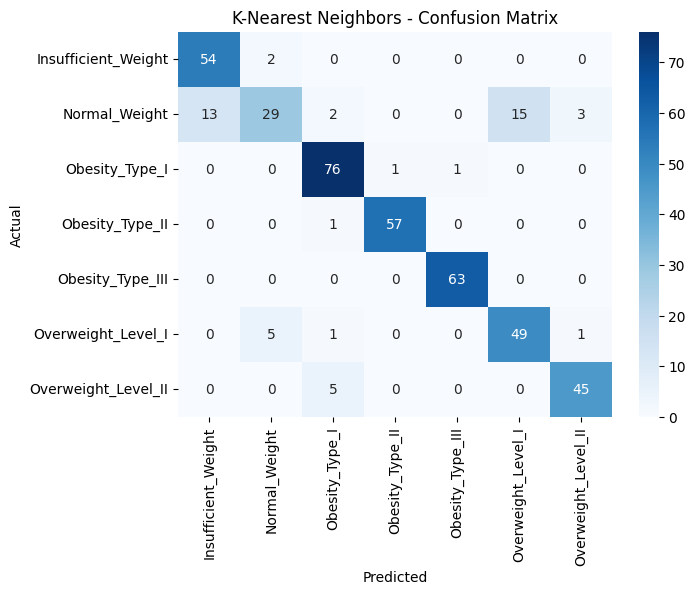

Precision per class:
  Insufficient_Weight: 0.8060
  Normal_Weight: 0.8056
  Obesity_Type_I: 0.8941
  Obesity_Type_II: 0.9828
  Obesity_Type_III: 0.9844
  Overweight_Level_I: 0.7656
  Overweight_Level_II: 0.9184

Recall per class:
  Insufficient_Weight: 0.9643
  Normal_Weight: 0.4677
  Obesity_Type_I: 0.9744
  Obesity_Type_II: 0.9828
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.8750
  Overweight_Level_II: 0.9000

Evaluation for Naive Bayes:
Accuracy in %: 64.07


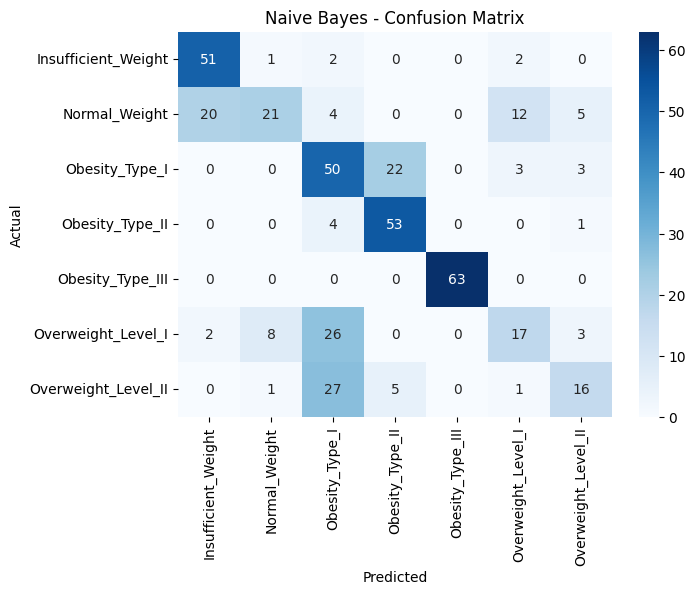

Precision per class:
  Insufficient_Weight: 0.6986
  Normal_Weight: 0.6774
  Obesity_Type_I: 0.4425
  Obesity_Type_II: 0.6625
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.4857
  Overweight_Level_II: 0.5714

Recall per class:
  Insufficient_Weight: 0.9107
  Normal_Weight: 0.3387
  Obesity_Type_I: 0.6410
  Obesity_Type_II: 0.9138
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.3036
  Overweight_Level_II: 0.3200

Evaluation for Decision Tree:
Accuracy in %: 93.14


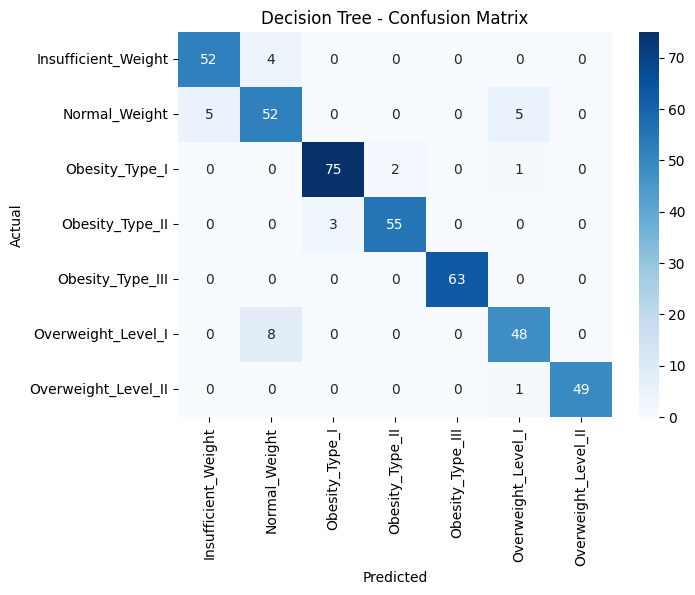

Precision per class:
  Insufficient_Weight: 0.9123
  Normal_Weight: 0.8125
  Obesity_Type_I: 0.9615
  Obesity_Type_II: 0.9649
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.8727
  Overweight_Level_II: 1.0000

Recall per class:
  Insufficient_Weight: 0.9286
  Normal_Weight: 0.8387
  Obesity_Type_I: 0.9615
  Obesity_Type_II: 0.9483
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.8571
  Overweight_Level_II: 0.9800

Evaluation for Support Vector Machine:
Accuracy in %: 88.65


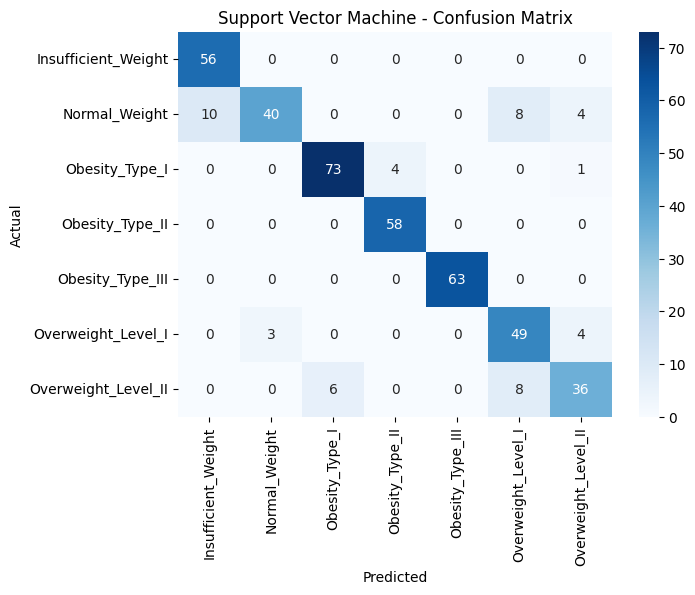

Precision per class:
  Insufficient_Weight: 0.8485
  Normal_Weight: 0.9302
  Obesity_Type_I: 0.9241
  Obesity_Type_II: 0.9355
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.7538
  Overweight_Level_II: 0.8000

Recall per class:
  Insufficient_Weight: 1.0000
  Normal_Weight: 0.6452
  Obesity_Type_I: 0.9359
  Obesity_Type_II: 1.0000
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.8750
  Overweight_Level_II: 0.7200

Summary of Evaluation Metrics:

K-Nearest Neighbors
Precision: 0.8795
Recall: 0.8806
------------------------------
Naive Bayes
Precision: 0.6483
Recall: 0.6325
------------------------------
Decision Tree
Precision: 0.9320
Recall: 0.9306
------------------------------
Support Vector Machine
Precision: 0.8846
Recall: 0.8823
------------------------------


In [ ]:
                      # 3. Model evaluation:

# For each model, compute the following evaluation metrics in the test set.
# • Accuracy: Overall percentage of correctly predicted instances.
# • Confusion Matrix: A table that visualizes true vs. predicted classes.
# • Recall: The model’s ability to capture all relevant cases (i.e., true positives).
# • Precision: The quality of the positive predictions made by the model.
# Comparison: Compare the models based on these metrics and decide which algorithm performs best.
# Provide a clear reasoning behind your choice, considering factors such as data distribution, model assumptions, and performance metrics.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Store all models and predictions
models = {
    "K-Nearest Neighbors": (knn, y_pred_knn),
    "Naive Bayes": (nb, y_pred_nb),
    "Decision Tree": (dt, y_pred_dt),
    "Support Vector Machine": (svm, y_pred_svm)
}

# an empty dictionary to store accuracy, precision, recall for each model
evaluation_results = {}

# gets the original class names that were encoded by the LabelEncoder
class_names = label_encoders['NObeyesdad'].classes_

for name, (model, y_pred) in models.items():
    print(f"\nEvaluation for {name}:")

    # Accuracy
    acc = accuracy_score(y_test, y_pred)  # correct predictions / total predictions
    print(f"Accuracy in %: {acc*100:.2f}")  # Formatting the value of acc to 2 decimal places

    # Confusion Matrix to help visualize error
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)  # output_dict=True stores it in a dictionary so we can extract values

    # Print Precision per class
    print("Precision per class:")
    for clas in class_names:
        print(f"  {clas}: {report[clas]['precision']:.4f}") # report[clas]['precision']:.4f accesses the precision value for that class

    # Print Recall per class
    print("\nRecall per class:")
    for clas in class_names:
        print(f"  {clas}: {report[clas]['recall']:.4f}")

    # Storinh evaluation metrics (excluding weighted avg)
    # getting average of precision and recall
    evaluation_results[name] = {
        #"accuracy": acc,
        "precision": report['macro avg']['precision'],
        "recall": report['macro avg']['recall'],
    }

# Summary
print("\nSummary of Evaluation Metrics:\n")
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name.capitalize()}: {metric_value:.4f}")
    print("-" * 30)